Imports and dowlands
# Новый раздел

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers

#dowland with keras
# Загружаем датасет
from tensorflow.keras.datasets import imdb

# Ограничиваем словарь 10_000 самыми частыми словами
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Посмотрим типы и размеры данных
print(f"Тип train_data: {type(train_data)}, длина: {len(train_data)}")
print(f"Тип train_labels: {type(train_labels)}, длина: {len(train_labels)}")

# Посмотрим пример первого отзыва и его метку
print("Пример отзыва (train_data[0]):", train_data[0])
print("Метка этого отзыва (train_labels[0]):", train_labels[0])

# Длина первого отзыва
print("Длина первого отзыва:", len(train_data[0]))


Тип train_data: <class 'numpy.ndarray'>, длина: 25000
Тип train_labels: <class 'numpy.ndarray'>, длина: 25000
Пример отзыва (train_data[0]): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 

# one-hot encoding

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Преобразуем метки в numpy массивы типа float32
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


# Splitting into training and validation sets

In [5]:
# Используем первые 10,000 примеров для валидации
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Model building

In [8]:
from tensorflow.keras import Input

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


# Train

In [9]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6824 - loss: 0.6135 - val_accuracy: 0.8589 - val_loss: 0.4125
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8910 - loss: 0.3542 - val_accuracy: 0.8754 - val_loss: 0.3245
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9189 - loss: 0.2510 - val_accuracy: 0.8895 - val_loss: 0.2856
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9373 - loss: 0.2000 - val_accuracy: 0.8755 - val_loss: 0.3047
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9507 - loss: 0.1668 - val_accuracy: 0.8883 - val_loss: 0.2777
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9557 - loss: 0.1439 - val_accuracy: 0.8854 - val_loss: 0.2849
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9633 - loss: 0.1209 - val_accuracy: 0.8777 - val_loss: 0.3049
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9728 - loss: 0.0997 - val_accuracy: 0.8760 - v

#Visualization

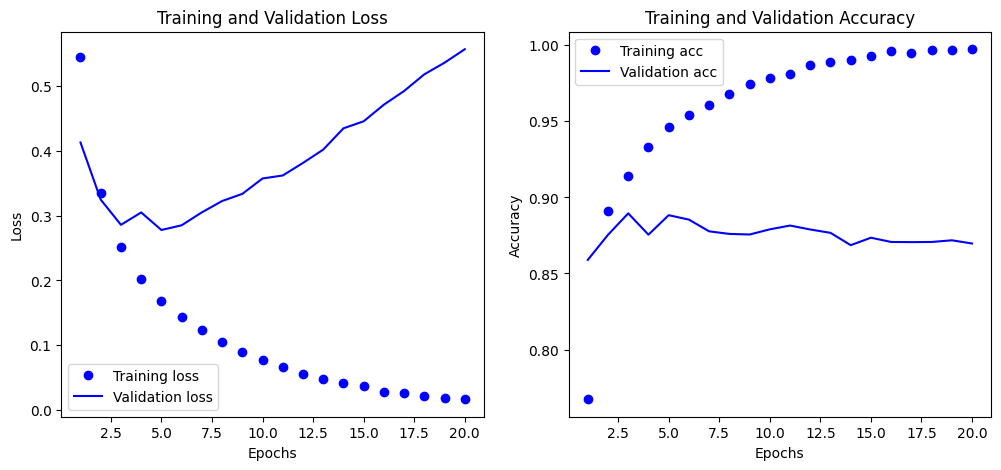

In [10]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss) + 1)

# График потерь
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# График точности
plt.subplot(1,2,2)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# Retraining with optimal number of epochs and final evaluation

In [11]:
# Обычно видно, что после 4-5 эпох начинается переобучение.
# Обучаем заново только с этим числом эпох.

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(f"Final Test Loss: {results[0]:.4f}")
print(f"Final Test Accuracy: {results[1]:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7316 - loss: 0.5599
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9093 - loss: 0.2707
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9286 - loss: 0.2029
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9421 - loss: 0.1690
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8827 - loss: 0.2940
Final Test Loss: 0.2911
Final Test Accuracy: 0.8850


# Analyze Results:

The constructed binary text classification model for the IMDB dataset achieves a final test accuracy of 88.5%, which can be considered a satisfactory result for the given task. At the same time, there is still room for further improvement of the model’s performance.

The optimal number of training epochs was determined experimentally, which helped to avoid overfitting and maintain the model’s ability to generalize to new data.

As a next step, the process of selecting the optimal number of epochs can be automated by using techniques such as EarlyStopping or saving the best model weights during training. This would simplify fine-tuning and increase the stability and reproducibility of results.